In [1]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

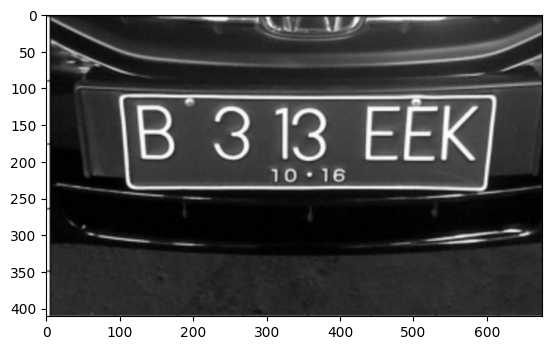

In [4]:
img = cv2.imread('Plat B.jpeg')

# UBAH WARNA KE GRAYSCALE
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# TAMPILKAN MENGGUNAKAN LIBRARY MATPLOTLIB
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

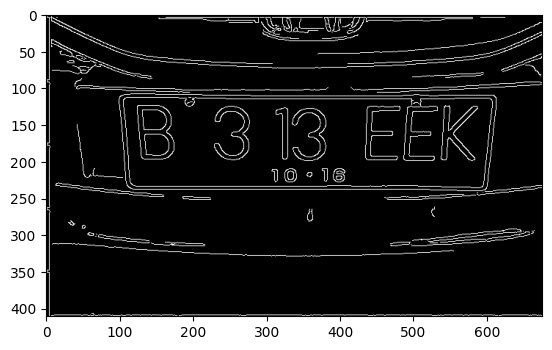

In [5]:
# SMOOTHING GAMBAR DENGAN BILATERAL FILTER
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# EDGE DETECTION DENGAN METODE CANNY
edged = cv2.Canny(bfilter, 30, 100)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
"""
FIND CONTOURS MENDETEKSI PERUBAHAN WARNA GAMBAR DAN MEMINDAINYA SEBAGAI KONTUR
GAMBAR ATAU ANGKA YANG TERTULIS PADA CITRA AKAN DIDETEKSI SEBAGAI KONTUR
"""
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [7]:
"""
APPROXPOLYDP MEMUNGKINKAN PERKIRAAN POLIGON (GAMBAR DENGAN BANYAK SUDUT),
JADI JIKA GAMBAR BERISI POLIGON, FUNGSI INI AKAN CUKUP AKURAT MENDETEKSINYA.
"""
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [8]:
location

array([[[ 99, 115]],

       [[118, 238]],

       [[601, 234]],

       [[610, 110]]], dtype=int32)

In [9]:
"""
DRAWCONTOURS BERFUNGSI UNTUK MELAPISI KONTUR PADA GAMBAR RGB ASLI.
"""
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

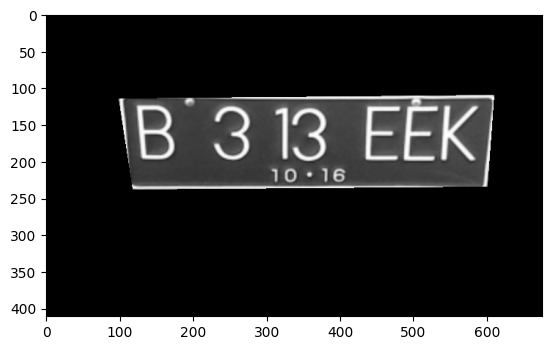

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
# CROPPING GAMBAR
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

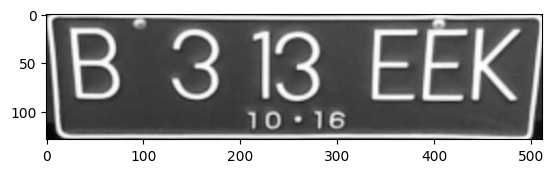

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
# PENERAPAN LIBRARY EASYOCR
render = easyocr.Reader(['en'])
result = render.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[16, 4], [296, 4], [296, 100], [16, 100]], 'B 3 13', 0.9975943240189501),
 ([[324, 0], [500, 0], [500, 102], [324, 102]], 'EEK', 0.9982400638917989),
 ([[204, 96], [314, 96], [314, 124], [204, 124]],
  "10 ' 16",
  0.363294956413786)]

In [14]:
"""
DARI KONVENSI OCR TERDAPAT 3 LIST (DALAM BAHASA PEMROGRAMAN LAIN DISEBUT DENGAN ARRAY)
UNTUK MENGELIMINASI BILANGAN YANG TIDAK PENTING DAN HANYA MENGAMBIL VALUE HASIL OCR.

PENULISAN KODE DIBAWAH DISESUAIKAN DENGAN HASIL OCR,
APABILA 2 LIST, HANYA TULISKAN SAMPAI LIST KEDUA,
APABILA 3 LIST, HANYA TULISKAN SAMPAI LIST KETIGA.
"""

text1 = str.upper(result[0][1])
text2 = str.upper(result[1][1])
text3 = str.upper(result[2][1])

In [15]:
# TAMPILKAN ISI VARIABEL TEXT
text1, text2, text3

('B 3 13', 'EEK', "10 ' 16")